In [1]:
import illoominate
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
train_df = pd.read_csv('data/nowplaying1m/processed/train.csv', sep='\t')
validation_df = pd.read_csv('data/nowplaying1m/processed/valid.csv', sep='\t')
test_df = pd.read_csv('data/nowplaying1m/processed/test.csv', sep='\t')

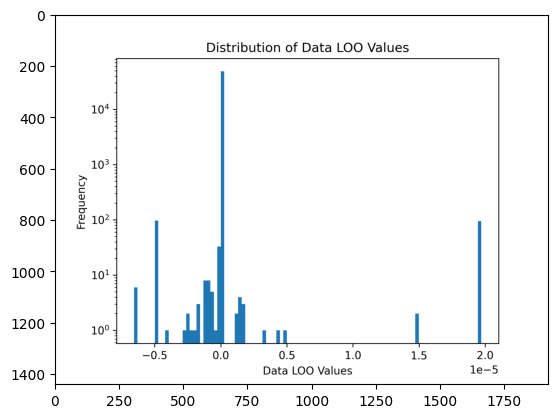

In [3]:
loo_values = illoominate.data_loo_values(
    train_df=train_df,
    validation_df=validation_df,
    model='vmis',
    metric='mrr@20',
    params={'m':500, 'k':100, 'seed': 42},
)

plt.hist(loo_values['score'], density=False, bins=100)
plt.title('Distribution of Data LOO Values')
plt.yscale('log')
plt.ylabel('Frequency')
plt.xlabel('Data LOO Values')
plt.savefig('images/loo.png', dpi=300)
plt.show()


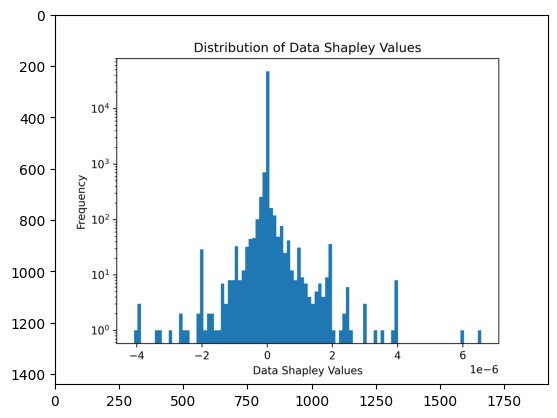

In [4]:
shapley_values = illoominate.data_shapley_values(
    train_df=train_df,
    validation_df=validation_df,
    model='vmis',
    metric='mrr@20',
    params={'m':500, 'k':100, 'seed': 42},
)


plt.hist(shapley_values['score'], density=False, bins=100)
plt.title('Distribution of Data Shapley Values')
plt.yscale('log')
plt.ylabel('Frequency')
plt.xlabel('Data Shapley Values')
plt.savefig('images/shapley.png', dpi=300)
plt.show()


In [9]:
negative = shapley_values[shapley_values.score < 0]
corrupt_sessions = train_df.merge(negative, on='session_id')
corrupt_sessions

,session_id,item_id,timestamp,score
0,5076,64,1585507853,-2.931978e-05
1,13946,119,1584189394,-2.606203e-05
2,13951,173,1585417176,-6.515507e-06
3,3090,199,1584196605,-2.393995e-05
4,5076,205,1585507872,-2.931978e-05
...,...,...,...,...
956,13951,5860,1585416925,-6.515507e-06
957,447,3786,1584448579,-5.092383e-06
958,7573,14467,1584450303,-7.107826e-07
959,5123,47,1584808576,-4.295939e-07
